# 1. UC San Diego: Neural Data Science


## 1.1 Analysis on Memory and Anxiety Medication

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* ['X'] YES - make available
* [  ] NO - keep private

# Names

- Brian Lee
- Manjari Muruganandam
- Bianca Yongyuth

# Overview

We have chosen the data set "Memory Test on Drugged Islanders" collected by Steve Ahn to help us understand and solve our research question revolving around the interconnections between anti-anxiety medication, emotional priming, and memory recall. Our group plans to import the available CSV file to analyze the data further with Python due to its pandas library allowing for proper data analysis, manipulation, and statistical computation.These plots will provide a clear and intuitive way to compare the data on memory recall scores across the different levels of drug dosages and emotional priming conditions. The experimental design was a block study design- where participants were divided into Happy or Sad groups, and those groups were then subdivided by Drugs Alprazolam, Triazola, and Sugar. The 6 groups were then subdivided by dosage treatment number, resulting in 18 unique groups.

<a id='research_question'></a>
# Research Question

Does the efficacy of Alprazolam and Triazolam in modulating memory recall vary depending on dosage and the emotional priming of happy or sad memories?

Do the medications Alprazolam and Triazolam alongside the emotional priming of happy or sad memories significantly affect memory recall????

<a id='background'></a>

## Background & Prior Work

The motivation behind our research question stems from our curiosity about the possible relationships between anti-anxiety medication, emotional priming, and memory recall. By investigating the efficacy of Alprazolam and Triazolam across different dosages and emotional priming contexts, we aim to analyze how these medications regulate memory processes. Given the prevalence of benzodiazepine usage and the growing interest in memory enhancement and emotional regulation, analyzing how these drugs interact can provide valuable insights into both clinical and cognitive fields. It is particularly intriguing to understand the extent to which memory recall is affected, and whether the benefits outweigh the costs of using these medications in select populations.

The broader context involves understanding the relationship between anxiety medications and memory recall, as well as how factors such as age and genetics influence the medications' adverse side effects, guiding clinicians in prescribing therapeutics. According to the paper “Savoring the Past: Positive Memories Evoke Value Representations in the Striatum,” positive memories enhance memory recall and resiliency, correlating with increased activity in the striatum and medial prefrontal cortex. If anxiety medication negatively impacts mood, it could reduce activity in these brain regions, thereby diminishing resilience and memory recall. Additionally, the study “With Sadness Comes Accuracy; With Happiness, False Memory: Mood and the False Memory Effect” explains that the Deese-Roediger-McDermott paradigm reveals that positive affective cues encourage relational processing during encoding, whereas negative affective cues encourage item-specific processing. Thus, anxiety medications impacting mood could shift processing strategies during encoding, selectively affecting memory recall. Furthermore, the paper “Analysis of Adverse Behavioral Effects of Benzodiazepines With a Discussion on Drawing Scientific Conclusions from the FDA's Spontaneous Reporting System” highlights the link between benzodiazepines, such as Alprazolam, and mental and behavioral abnormalities due to CNS suppression and the binding of benzodiazepine to GABA receptors. By integrating findings from these studies, we aim to deepen our understanding of how anxiety medications influence cognitive processes, ultimately contributing to more informed clinical practices.

References (include links):
- 1) https://www.google.com/url?q=https://www.sciencedirect.com/science/article/pii/S0896627314008484&sa=D&source=docs&ust=1717727980574275&usg=AOvVaw2aR5KYbhtiabIwfv8_uIXz
- 2) https://www.google.com/url?q=https://www.jstor.org/stable/40064315&sa=D&source=docs&ust=1717727980576782&usg=AOvVaw0h7aHzhOw5XlkjEMBhY72G
- 3) https://www.google.com/url?q=http://www.jstor.org/stable/43854146&sa=D&source=docs&ust=1717727980576945&usg=AOvVaw3a143kw42FFD99B_9ChNTW

# Hypothesis


Therefore, we hypothesize that pairing the control group primed with sad memories prior to memory testing will perform the best, and it will perform significantly better than the pairing of a higher dosage of Alprazolam (which contains a long-term effect benzodiazepin) with the emotional priming of happy memories- which will perform the worst among the groups. 

# Dataset(s)

- Dataset Name: Memory Test on Drugged Islanders
- Link to the dataset: https://www.kaggle.com/datasets/steveahn/memory-test-on-drugged-islanders-data/data
- Number of observations: 198 Participants

This dataset contains information on memory test scores of participants before and after administration of anti-anxiety medications, Alprazolam and Triazolam, along with varying dosages and emotional priming contexts. The data includes demographic details and memory score differences, enabling analysis of how these factors influence memory recall.

# Data Wrangling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"
from plotly.subplots import make_subplots

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df = pd.read_csv('Islander_data.csv')
df

#diff = after - before

,first_name,last_name,age,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After,Diff
0,Bastian,Carrasco,25,H,1,A,63.5,61.2,-2.3
1,Evan,Carrasco,52,S,1,A,41.6,40.7,-0.9
2,Florencia,Carrasco,29,H,1,A,59.7,55.1,-4.6
3,Holly,Carrasco,50,S,1,A,51.7,51.2,-0.5
4,Justin,Carrasco,52,H,1,A,47.0,47.1,0.1
...,...,...,...,...,...,...,...,...,...
193,Jacob,Novak,52,H,3,T,71.3,74.3,3.0
194,Teo,Steiner,41,S,3,T,72.5,70.4,-2.1
195,Alexander,Takahashi,54,S,3,T,30.8,33.1,2.3
196,Alexandere,Takahashi,40,H,3,T,53.6,53.8,0.2


# Data Cleaning

### remove Nan and duplicate values

In [2]:
# Data Cleaning
df.drop_duplicates(inplace = True)  # Remove duplicates
df.dropna(inplace = True)  # Remove rows with null values
df

,first_name,last_name,age,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After,Diff
0,Bastian,Carrasco,25,H,1,A,63.5,61.2,-2.3
1,Evan,Carrasco,52,S,1,A,41.6,40.7,-0.9
2,Florencia,Carrasco,29,H,1,A,59.7,55.1,-4.6
3,Holly,Carrasco,50,S,1,A,51.7,51.2,-0.5
4,Justin,Carrasco,52,H,1,A,47.0,47.1,0.1
...,...,...,...,...,...,...,...,...,...
193,Jacob,Novak,52,H,3,T,71.3,74.3,3.0
194,Teo,Steiner,41,S,3,T,72.5,70.4,-2.1
195,Alexander,Takahashi,54,S,3,T,30.8,33.1,2.3
196,Alexandere,Takahashi,40,H,3,T,53.6,53.8,0.2


### check for inconsistencies in data

In [3]:
df.describe(include='all')  # Summary statistics


,first_name,last_name,age,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After,Diff
count,198,198,198.000000,198,198.000000,198,198.000000,198.000000,198.000000
unique,139,18,NaN,2,NaN,3,NaN,NaN,NaN
top,Jun,Durand,NaN,H,NaN,A,NaN,NaN,NaN
freq,5,44,NaN,99,NaN,67,NaN,NaN,NaN
mean,NaN,NaN,39.530303,NaN,1.989899,NaN,57.967677,60.922222,2.954545
std,NaN,NaN,12.023099,NaN,0.818504,NaN,15.766007,18.133851,10.754603
min,NaN,NaN,24.000000,NaN,1.000000,NaN,27.200000,27.100000,-40.400000
25%,NaN,NaN,30.000000,NaN,1.000000,NaN,46.525000,47.175000,-3.175000
50%,NaN,NaN,37.000000,NaN,2.000000,NaN,54.800000,56.750000,1.700000
75%,NaN,NaN,48.000000,NaN,3.000000,NaN,68.400000,73.250000,5.925000


In [4]:
df.info() # shows the datatype of each column (ensures we have one dtype per column)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198 entries, 0 to 197
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   first_name        198 non-null    object 
 1   last_name         198 non-null    object 
 2   age               198 non-null    int64  
 3   Happy_Sad_group   198 non-null    object 
 4   Dosage            198 non-null    int64  
 5   Drug              198 non-null    object 
 6   Mem_Score_Before  198 non-null    float64
 7   Mem_Score_After   198 non-null    float64
 8   Diff              198 non-null    float64
dtypes: float64(3), int64(2), object(4)
memory usage: 15.5+ KB


In [5]:
# Checking unique values for categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    unique_values = df[column].unique()
    print(f"\nUnique values for column '{column}':")
    print(unique_values)

# Checking range of values for numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
for column in numerical_columns:
    min_value = df[column].min()
    max_value = df[column].max()
    print(f"\nRange of values for column '{column}':")
    print(f"Min: {min_value}, Max: {max_value}")


Unique values for column 'first_name':
['Bastian' 'Evan' 'Florencia' 'Holly' 'Justin' 'Liam' 'Ava' 'Jamie'
 'Josefa' 'Mark' 'Maximiliano' 'Ayano' 'Grace' 'Ai' 'Kaito' 'Jun' 'Takuya'
 'Justine' 'Nik' 'Carlos' 'Anna' 'Daichi' 'Dean' 'Riley' 'Sofia' 'Darren'
 'Fernado' 'Misaki' 'Orla' 'Robert' 'Valentina' 'Ryan' 'Jose' 'Shota'
 'Anthony' 'Nina' 'Lara' 'Daiki' 'Felipe' 'Camila' 'Hama' 'Miki' 'Riko'
 'Benjamin' 'Hina' 'Kevin' 'Takahiro' 'Megan' 'Akane' 'Ren' 'Laura'
 'Ariane' 'Naoto' 'Jade' 'Tomax' 'Ami' 'Mai' 'Yuta' 'Marianne' 'Mathis'
 'Martina' 'William' 'Tatsuya' 'Raphael' 'Fabian' 'Paula' 'Sho'
 'Frederique' 'Killian' 'Jeremy' 'Lan' 'Riku' 'Rin' 'Karin' 'Christian'
 'Ignacio' 'Joaquin' 'Momoko' 'Sara' 'Alejandra' 'Rok' 'Carla' 'Alexia'
 'Nanami' 'Victor' 'Sophia' 'Kana' 'Aya' 'Eva' 'Shun' 'Adam' 'Ayaka'
 'Ryouta' 'Antoine' 'Ciara' 'Mitsuku' 'Takumi' 'Kenta' 'Pia' 'Erin'
 'Michael' 'Sakura' 'Chloe' 'Tobias' 'Shauna' 'Ross' 'Daniel' 'Asuka'
 'Emma' 'Nathan' 'Akira' 'David' 'Manuel' 'Sea

Overall, dtypes, values, and the df are clean and we are ready for data visualization. There are few inconsistencies. 

# Data Visualization

## checking for confounds

**Check to see if the averages between groups are significantly different**
* if middle line of boxplot is outside the box of the other boxplot, there is a significant difference
* That is not the case for any of these

**check for outliers**
* black points outside of boxplot whiskers are considered outliers

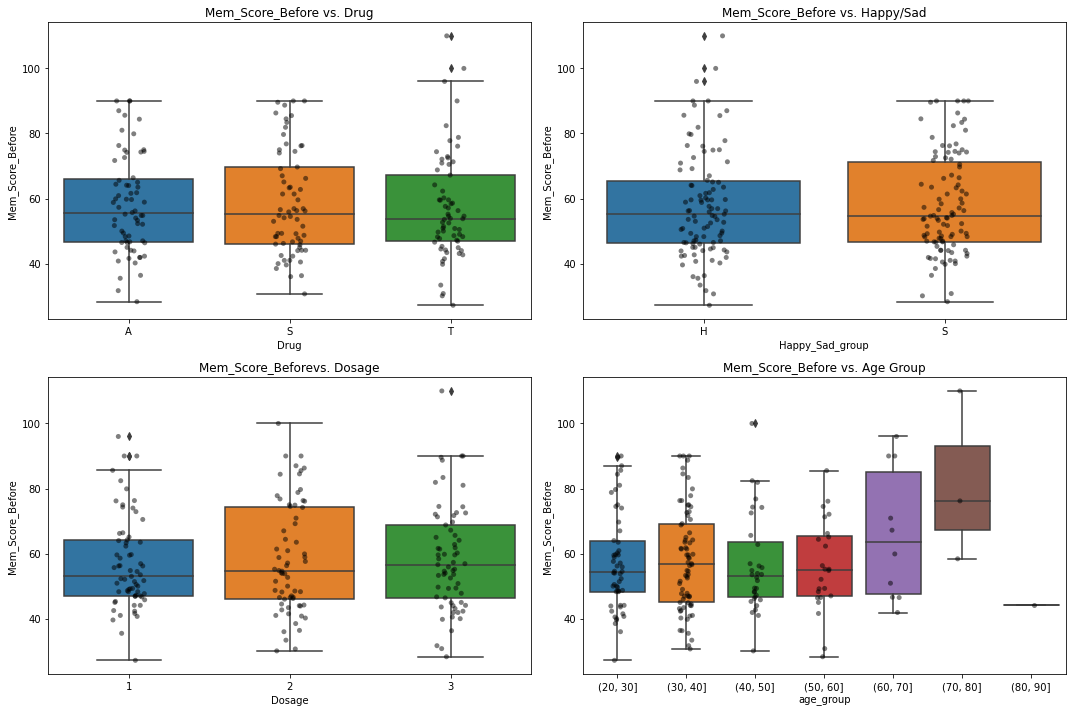

In [6]:
# Box plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# diff vs. drug
sns.boxplot(data=df, x='Drug', y='Mem_Score_Before', ax=axes[0, 0])
sns.stripplot(data=df, x='Drug', y='Mem_Score_Before', color='black', alpha=0.5, ax=axes[0, 0])
axes[0, 0].set_title('Mem_Score_Before vs. Drug')

# diff vs. happy/sad
sns.boxplot(data=df, x='Happy_Sad_group', y='Mem_Score_Before', ax=axes[0, 1])
sns.stripplot(data=df, x='Happy_Sad_group', y='Mem_Score_Before', color='black', alpha=0.5, ax=axes[0, 1])
axes[0, 1].set_title('Mem_Score_Before vs. Happy/Sad')

# diff vs. dosage
sns.boxplot(data=df, x='Dosage', y='Mem_Score_Before', ax=axes[1, 0])
sns.stripplot(data=df, x='Dosage', y='Mem_Score_Before', color='black', alpha=0.5, ax=axes[1, 0])
axes[1, 0].set_title('Mem_Score_Beforevs. Dosage')

# diff vs. age (grouped by ranges)
age_bins = [20, 30, 40, 50, 60, 70, 80, 90]
df['age_group'] = pd.cut(df['age'], bins=age_bins)
sns.boxplot(data=df, x='age_group', y='Mem_Score_Before', ax=axes[1, 1])
sns.stripplot(data=df, x='age_group', y='Mem_Score_Before', color='black', alpha=0.5, ax=axes[1, 1])
axes[1, 1].set_title('Mem_Score_Before vs. Age Group')

plt.tight_layout()
plt.show()


### Number of datapoints per feature

* Columns 'Happy_Sad_group', 'Drug', and 'Dosage' have approximately equal distributions of each category. 
* However, the pie chart for the 'age' column shows that fewer 50-60 and 60-70 year olds enrolled in the study compared to 20-30, 30-40, and 40-50 year olds. There are extremely few 70-80 and 80-90 year olds
    * if age is a major factor in memory, will need to either correct for this or remove datapoints


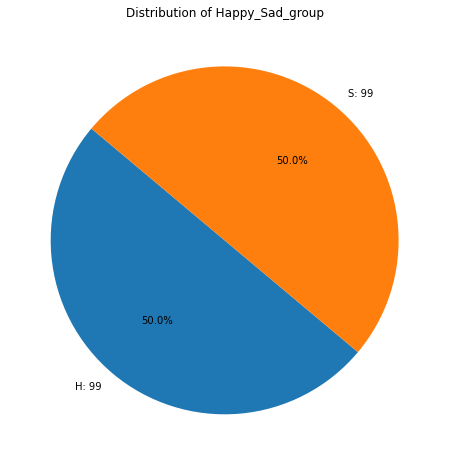

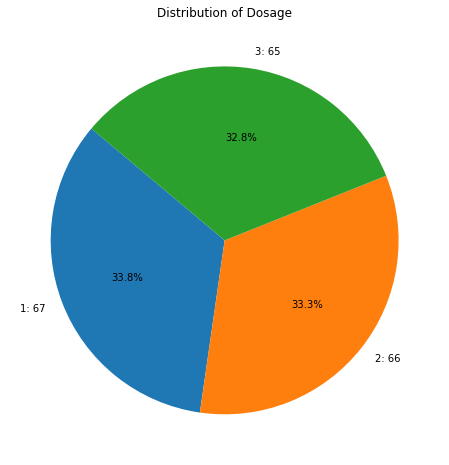

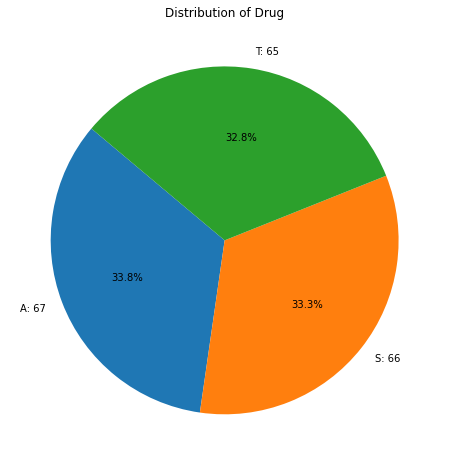

In [7]:

# Function to plot pie chart
def plot_pie_chart(series, title):
    counts = series.value_counts()
    labels = [f"{label}: {count}" for label, count in zip(counts.index, counts)]
    plt.figure(figsize=(8, 8))
    plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title(title)
    plt.show()

# Plot pie chart for 'Happy_Sad_group'
plot_pie_chart(df['Happy_Sad_group'], 'Distribution of Happy_Sad_group')

# Plot pie chart for 'Dosage'
plot_pie_chart(df['Dosage'], 'Distribution of Dosage')

# Plot pie chart for 'Drug'
plot_pie_chart(df['Drug'], 'Distribution of Drug')

Note that we have fewer older people in this study. 

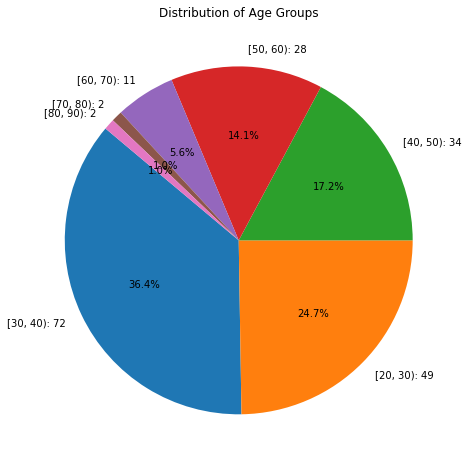

In [8]:
# Group 'age' into bins and plot pie chart
age_bins = pd.cut(df['age'], bins=[20, 30, 40, 50, 60, 70, 80, 90], right=False)
plot_pie_chart(age_bins, 'Distribution of Age Groups')


### Removing age group 70 and up due to extremely small group size
(2 datapoints cannot be representative of the whole population of 70-80 and 80-90 year olds)

In [9]:
df = df[df['age'] <= 70]
df

,first_name,last_name,age,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After,Diff,age_group
0,Bastian,Carrasco,25,H,1,A,63.5,61.2,-2.3,"(20, 30]"
1,Evan,Carrasco,52,S,1,A,41.6,40.7,-0.9,"(50, 60]"
2,Florencia,Carrasco,29,H,1,A,59.7,55.1,-4.6,"(20, 30]"
3,Holly,Carrasco,50,S,1,A,51.7,51.2,-0.5,"(40, 50]"
4,Justin,Carrasco,52,H,1,A,47.0,47.1,0.1,"(50, 60]"
...,...,...,...,...,...,...,...,...,...,...
193,Jacob,Novak,52,H,3,T,71.3,74.3,3.0,"(50, 60]"
194,Teo,Steiner,41,S,3,T,72.5,70.4,-2.1,"(40, 50]"
195,Alexander,Takahashi,54,S,3,T,30.8,33.1,2.3,"(50, 60]"
196,Alexandere,Takahashi,40,H,3,T,53.6,53.8,0.2,"(30, 40]"


**Checking to see if the mem_score_before is normally distributed**
* there is a slight left skew
* The Q-Q plot shows some deviations from the red line, especially in the tails, indicating slight skewness
* However, this data is close enough to normal

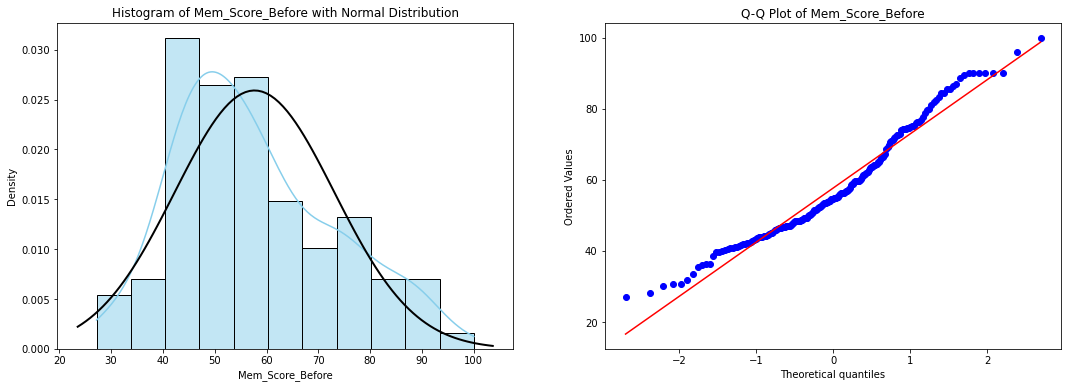

In [10]:
from scipy.stats import norm, probplot
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Histogram with fitted normal distribution curve
sns.histplot(df['Mem_Score_Before'], kde=True, ax=axs[0], color='skyblue', stat='density')
xmin, xmax = axs[0].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, df['Mem_Score_Before'].mean(), df['Mem_Score_Before'].std())
axs[0].plot(x, p, 'k', linewidth=2)
axs[0].set_title('Histogram of Mem_Score_Before with Normal Distribution')

# Q-Q plot
probplot(df['Mem_Score_Before'], dist="norm", plot=axs[1])
axs[1].set_title('Q-Q Plot of Mem_Score_Before')

plt.show()

# EDA Analysis & Results

## Data distribution

### Diff v. drug/Happy Sad/ Dosage/ age


* if middle line of boxplot is outside the box of the other boxplot, there is a significant difference
* Note that the median line for A is higher than the Interquartile range for S and T
    * This indicates a significant difference in memory between A with S and T
    * We will need to separate the drug types in further analysis to avoid averaging out the effect of drug A


/tmp/ipykernel_1068/578076523.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_group'] = pd.cut(df['age'], bins=age_bins)


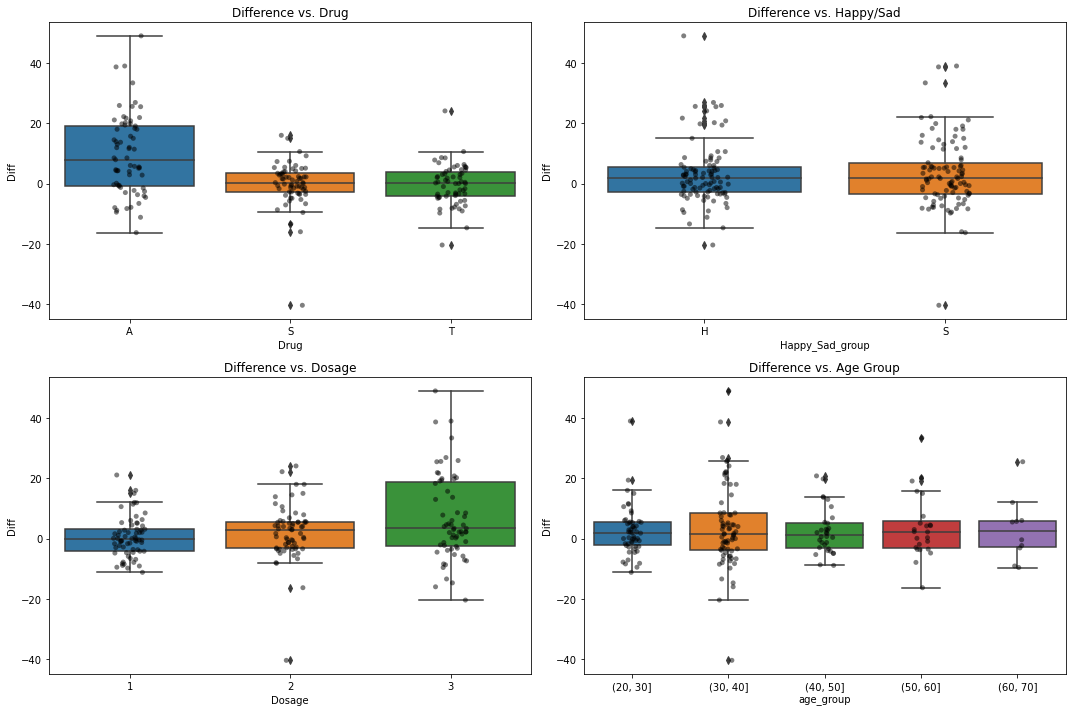

In [11]:
# Box plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# diff vs. drug
sns.boxplot(data=df, x='Drug', y='Diff', ax=axes[0, 0])
sns.stripplot(data=df, x='Drug', y='Diff', color='black', alpha=0.5, ax=axes[0, 0])
axes[0, 0].set_title('Difference vs. Drug')

# diff vs. happy/sad
sns.boxplot(data=df, x='Happy_Sad_group', y='Diff', ax=axes[0, 1])
sns.stripplot(data=df, x='Happy_Sad_group', y='Diff', color='black', alpha=0.5, ax=axes[0, 1])
axes[0, 1].set_title('Difference vs. Happy/Sad')

# diff vs. dosage
sns.boxplot(data=df, x='Dosage', y='Diff', ax=axes[1, 0])
sns.stripplot(data=df, x='Dosage', y='Diff', color='black', alpha=0.5, ax=axes[1, 0])
axes[1, 0].set_title('Difference vs. Dosage')

# diff vs. age (grouped by ranges)
#age_bins = [20, 30, 40, 50, 60]
age_bins = [20, 30, 40, 50, 60, 70]
df['age_group'] = pd.cut(df['age'], bins=age_bins)
sns.boxplot(data=df, x='age_group', y='Diff', ax=axes[1, 1])
sns.stripplot(data=df, x='age_group', y='Diff', color='black', alpha=0.5, ax=axes[1, 1])
axes[1, 1].set_title('Difference vs. Age Group')

plt.tight_layout()
plt.show()


### Dosage v difference for diff drugs

A postulate for determining wheter a relationship is causal is the Dose response relationship. It states that the greater the exposure, the greater the likelihood of the particular outcome (except with tresholds)
* Hence, the greater the dose of anxiety medication, the greater the difference in memory
* Drug 'A' shows the dose-response effect, while Drug 'T' does not

/tmp/ipykernel_1068/3790329003.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Drug'] = df['Drug'].astype('category')


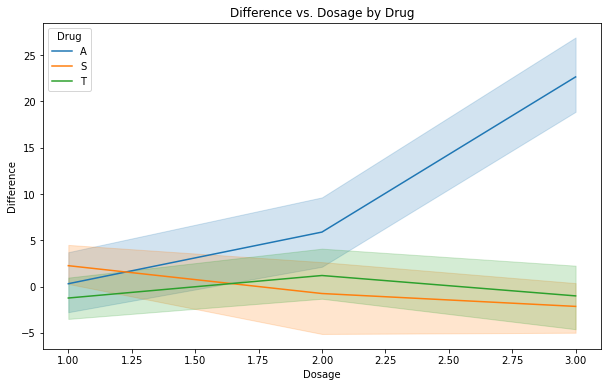

In [12]:
# Convert drug to categorical type- maybe change this
df['Drug'] = df['Drug'].astype('category')

# Line plot: dosage vs. difference with separate lines for each drug
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Dosage', y='Diff', hue='Drug')
plt.title('Difference vs. Dosage by Drug')
plt.xlabel('Dosage')
plt.ylabel('Difference')
plt.legend(title='Drug')
plt.show()

### t-tests (for graph above): 

** What is a t-test and when is it used?**
* A t-test is a statistical test used to determine if there is a significant difference between the means of two groups
* in this case- either a given dosage and comparing drugs, or comparing dosages with a given drug
* we will be using indepdendent samples t tests:
    * Used when you have two different groups and you want to compare their means.

**What is this code doing**
* testing to see if there are significant differences between different number of doses for the same drug
* also testing to see if the 3 drugs significantly differ per dose
* Drug 'A' significantly differs from dose to dose, and significantly differs from Drugs 'T' and 'S'

**confusing aspects of the results**

* there is a significant difference between 'S' and 'T'- at dose 1 only
* Significant difference between doses 1 and 3 of Drug 'S;

In [13]:
from scipy.stats import ttest_ind
import itertools

# Function to perform t-test between all three drugs at each dosage level
def perform_ttest_between_drugs(dosage):
    drugs = df['Drug'].unique()
    significant_results = []
    non_significant_results = []
    
    for drug1, drug2 in itertools.combinations(drugs, 2):
        group1 = df[(df['Dosage'] == dosage) & (df['Drug'] == drug1)]['Diff']
        group2 = df[(df['Dosage'] == dosage) & (df['Drug'] == drug2)]['Diff']
        t_stat, p_value = ttest_ind(group1, group2, equal_var=False)
        
        result = (f"Dosage: {dosage}, Drug Comparison: {drug1} vs {drug2}\n"
                  f"T-statistic: {t_stat}, P-value: {p_value}")
        if p_value < 0.05:
            significant_results.append(result + f"\nSignificant difference between {drug1} and {drug2} at dosage {dosage} (p < 0.05)")
        else:
            non_significant_results.append(result + f"\nNo significant difference between {drug1} and {drug2} at dosage {dosage} (p >= 0.05)")
    
    return significant_results, non_significant_results

# Function to perform t-test between dosages for the same drug
def perform_ttest_between_dosages(drug):
    dosages = df['Dosage'].unique()
    significant_results = []
    non_significant_results = []
    
    for dosage1, dosage2 in itertools.combinations(dosages, 2):
        group1 = df[(df['Dosage'] == dosage1) & (df['Drug'] == drug)]['Diff']
        group2 = df[(df['Dosage'] == dosage2) & (df['Drug'] == drug)]['Diff']
        t_stat, p_value = ttest_ind(group1, group2, equal_var=False)
        
        result = (f"Drug: {drug}, Dosage Comparison: {dosage1} vs {dosage2}\n"
                  f"T-statistic: {t_stat}, P-value: {p_value}")
        if p_value < 0.05:
            significant_results.append(result + f"\nSignificant difference between dosage {dosage1} and dosage {dosage2} for drug {drug} (p < 0.05)")
        else:
            non_significant_results.append(result + f"\nNo significant difference between dosage {dosage1} and dosage {dosage2} for drug {drug} (p >= 0.05)")
    
    return significant_results, non_significant_results

# Accumulate and print the results
all_significant_results = []
all_non_significant_results = []

# Performing t-tests between drugs at each dosage level
for dosage in df['Dosage'].unique():
    significant, non_significant = perform_ttest_between_drugs(dosage)
    all_significant_results.extend(significant)
    all_non_significant_results.extend(non_significant)

# Performing t-tests between dosages for each drug
for drug in df['Drug'].unique():
    significant, non_significant = perform_ttest_between_dosages(drug)
    all_significant_results.extend(significant)
    all_non_significant_results.extend(non_significant)

# Print significant results first
for res in all_significant_results:
    print(res)
    print("-" * 50)

# Add space between significant and non-significant results
if all_significant_results and all_non_significant_results:
    print("\n" + "=" * 50 + "\n")

# Print non-significant results
for res in all_non_significant_results:
    print(res)
    print("-" * 50)


Dosage: 1, Drug Comparison: S vs T
T-statistic: 2.105639380389042, P-value: 0.04140547853607697
Significant difference between S and T at dosage 1 (p < 0.05)
--------------------------------------------------
Dosage: 2, Drug Comparison: A vs S
T-statistic: 2.2992181647407577, P-value: 0.026562407052004872
Significant difference between A and S at dosage 2 (p < 0.05)
--------------------------------------------------
Dosage: 3, Drug Comparison: A vs S
T-statistic: 9.655574459722134, P-value: 3.04259266859377e-11
Significant difference between A and S at dosage 3 (p < 0.05)
--------------------------------------------------
Dosage: 3, Drug Comparison: A vs T
T-statistic: 8.350579304583334, P-value: 3.863433162556694e-10
Significant difference between A and T at dosage 3 (p < 0.05)
--------------------------------------------------
Drug: A, Dosage Comparison: 1 vs 2
T-statistic: -2.133439731134499, P-value: 0.03876946210222351
Significant difference between dosage 1 and dosage 2 for drug 

### age v difference for diff drugs
* no obvious trend

/tmp/ipykernel_1068/417658996.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Drug'] = df['Drug'].astype('category')


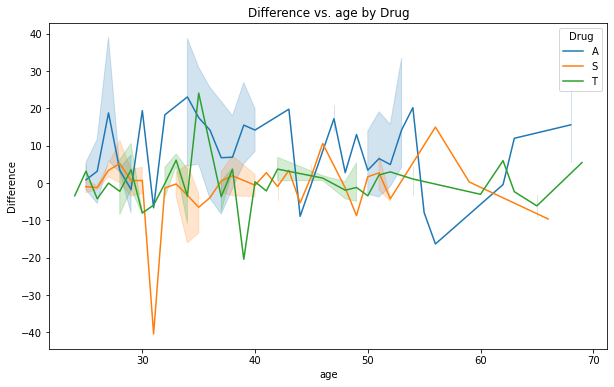

In [14]:
# Convert drug to categorical type- maybe change this
df['Drug'] = df['Drug'].astype('category')

# Line plot: dosage vs. difference with separate lines for each drug
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='age', y='Diff', hue='Drug')
plt.title('Difference vs. age by Drug')
plt.xlabel('age')
plt.ylabel('Difference')
plt.legend(title='Drug')
plt.show()

### Diff vs. Drug by Happy/Sad Group'


* no significant differences between Happy and Sad groups by drug, however, Drug A shows more variability

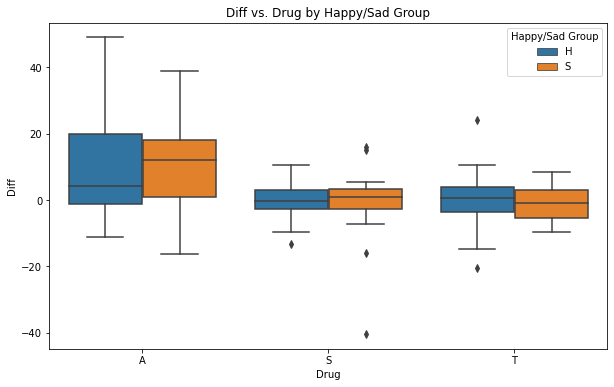

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame and already loaded
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Drug', y='Diff', hue='Happy_Sad_group')
plt.title('Diff vs. Drug by Happy/Sad Group')
plt.xlabel('Drug')
plt.ylabel('Diff')
plt.legend(title='Happy/Sad Group')
plt.show()


In [16]:
#filtered_df = df[(df['Drug'] == 'S') & (df['Happy_Sad_group'] == 'S')]
#filtered_df

### checking to see if there is any significant difference

* no significant difference

In [17]:
from scipy.stats import ttest_ind
# Function to perform t-test and print results
def perform_ttest(drug):
    happy_group = df[(df['Drug'] == drug) & (df['Happy_Sad_group'] == 'H')]['Diff']
    sad_group = df[(df['Drug'] == drug) & (df['Happy_Sad_group'] == 'S')]['Diff']
    t_stat, p_value = ttest_ind(happy_group, sad_group, equal_var=False)
    print(f"Drug: {drug}")
    print(f"T-statistic: {t_stat}, P-value: {p_value}")
    if p_value < 0.05:
        print(f"Significant difference between Happy and Sad groups for drug {drug} (p < 0.05)")
    else:
        print(f"No significant difference between Happy and Sad groups for drug {drug} (p >= 0.05)")
    print("-" * 50)

# Performing t-tests for each drug
for drug in df['Drug'].unique():
    perform_ttest(drug)

Drug: A
T-statistic: -0.6704281950534117, P-value: 0.5049620787469711
No significant difference between Happy and Sad groups for drug A (p >= 0.05)
--------------------------------------------------
Drug: S
T-statistic: 0.29462725763459835, P-value: 0.7695314947014337
No significant difference between Happy and Sad groups for drug S (p >= 0.05)
--------------------------------------------------
Drug: T
T-statistic: 1.009055998661902, P-value: 0.3175703364613326
No significant difference between Happy and Sad groups for drug T (p >= 0.05)
--------------------------------------------------


### ANOVA tests and tukey post hoc for statistical analysis

* We are able to test 3 relavent groups (Drug, Dosage, and Happy/sad groups with ANOVA, and correct for type 1 error with Tukey post hoc analysis
* Happy and sad groups show no statistical difference
* Dosage (1 and 2, and 2 and 3- show statistical difference)
* Drug: (A with T, and A with S) show statistical difference
    * A high f statistic for Drug and Dosage indicates higher within group variablility, and the low p value indicates a signficantly large effect of the Drug and Dosage on the dependent variable

In [18]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd


# Perform ANOVA for each categorical feature

# ANOVA for Dosage
model_dosage = ols('Diff ~ C(Dosage)', data=df).fit()
anova_table_dosage = sm.stats.anova_lm(model_dosage, typ=2)
print("ANOVA Table for Dosage:")
print(anova_table_dosage)

# ANOVA for Drug
model_drug = ols('Diff ~ C(Drug)', data=df).fit()
anova_table_drug = sm.stats.anova_lm(model_drug, typ=2)
print("\nANOVA Table for Drug:")
print(anova_table_drug)

# ANOVA for Happy_Sad_group
model_happy_sad = ols('Diff ~ C(Happy_Sad_group)', data=df).fit()
anova_table_happy_sad = sm.stats.anova_lm(model_happy_sad, typ=2)
print("\nANOVA Table for Happy_Sad_group:")
print(anova_table_happy_sad)

# Perform Tukey's HSD post-hoc analysis if ANOVA results are significant
# Tukey's HSD for Dosage
tukey_dosage = pairwise_tukeyhsd(endog=df['Diff'], groups=df['Dosage'], alpha=0.05)
print("\nTukey's HSD for Dosage:")
print(tukey_dosage)

# Tukey's HSD for Drug
tukey_drug = pairwise_tukeyhsd(endog=df['Diff'], groups=df['Drug'], alpha=0.05)
print("\nTukey's HSD for Drug:")
print(tukey_drug)

# Tukey's HSD for Happy_Sad_group
tukey_happy_sad = pairwise_tukeyhsd(endog=df['Diff'], groups=df['Happy_Sad_group'], alpha=0.05)
print("\nTukey's HSD for Happy_Sad_group:")
print(tukey_happy_sad)



ANOVA Table for Dosage:
                 sum_sq     df         F    PR(>F)
C(Dosage)   1427.270549    2.0  6.583047  0.001719
Residual   20705.355688  191.0       NaN       NaN

ANOVA Table for Drug:
                sum_sq     df          F        PR(>F)
C(Drug)    4186.370045    2.0  22.277534  2.013062e-09
Residual  17946.256192  191.0        NaN           NaN

ANOVA Table for Happy_Sad_group:
                          sum_sq     df         F    PR(>F)
C(Happy_Sad_group)      0.681701    1.0  0.005914  0.938782
Residual            22131.944536  192.0       NaN       NaN

Tukey's HSD for Dosage:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2   1.7109 0.6155 -2.5868  6.0086  False
     1      3   6.4433 0.0016  2.1114 10.7752   True
     2      3   4.7324 0.0292  0.3842  9.0806   True
----------------------------------------------------

Tukey's HSD for Drug:
 M

# Machine Learning program to predict Mem_after_Score given features

MSE: 18.586809435897433, MAE: 3.1082051282051277, RMSE: 4.311242214941934, r2: 0.7781618310317374


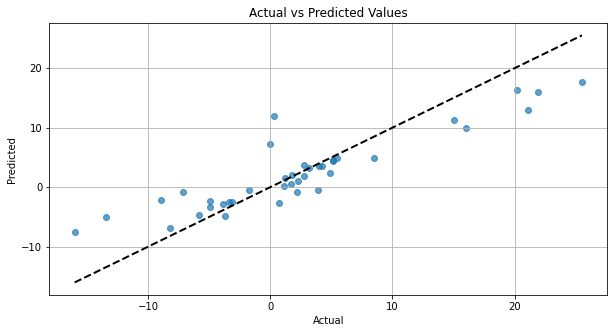

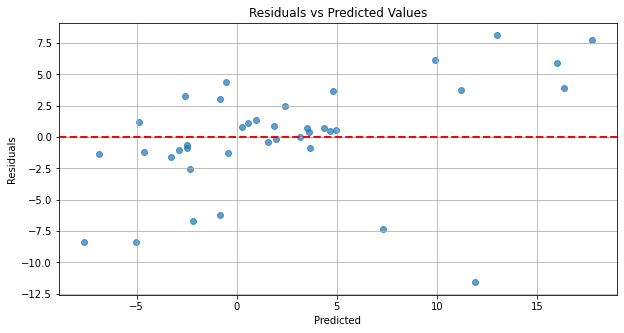

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

#Separate the target variable and features
X = df.drop(columns=['Diff', 'first_name', 'last_name']) #irrelevant features for model
y = df['Diff'] #target var

#Preprocess categorical features and numerical features
categorical_features = ['Happy_Sad_group', 'Drug']
numerical_features = ['age', 'Dosage', 'Mem_Score_Before', 'Mem_Score_After']

#Define the preprocessing steps for numerical and categorical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()) 
]) #imputer- replace missing value with means, scsaler- scale all numerical vals to 0-1 (equal impact in model)

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
]) #onehot- categorical columns into numerical vars

#Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

#Define the model pipeline (Pipeline- combine preprocessing steps and model- less error prone)
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

#Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train the model- # The fit method trains the RandomForestRegressor on the training data (X_train, y_train)
model.fit(X_train, y_train)

#Predict on the test set- This method uses the trained model to predict the target variable (Diff) for the test set (X_test).
y_pred = model.predict(X_test)

#Evaluate the model
r2 = r2_score(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'MSE: {mse}, MAE: {mae}, RMSE: {rmse}, r2: {r2}')

#Scatter plot of predicted vs actual values
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()

#Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 5))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.grid(True)
plt.show()


## the first scatterplot is actual v predicted values
## the second scatterplot shows the pattern of errors (residuals)

# Conclusion & Discussion